AML 2024 Exam notebook

The note book is completed by Viktor Juhl Jensen, Ali Aljundi & Sofus Pedersen

In [36]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_csv('ai4i2020.csv')

df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


text

In [38]:
corr_matrix = df.corr()
corr_matrix['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64

In [181]:
features = df.drop(['Machine failure'], axis=1)
features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [191]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['Machine failure'], axis=1)
y = df['Machine failure']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# RandomForestClassifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

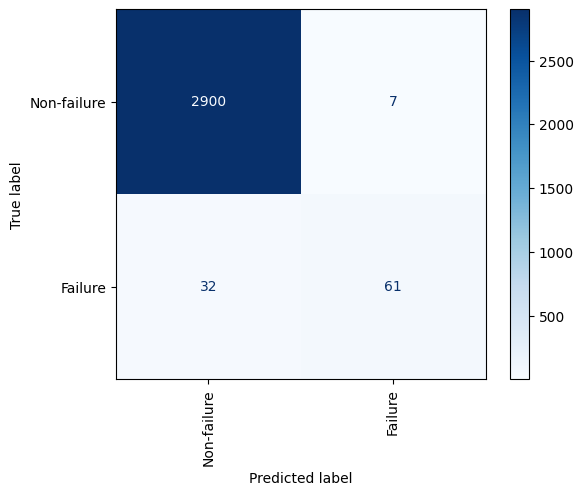

In [199]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = rf_model.predict(X_test) >= 1
labels = ['Non-failure','Failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

In [185]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nEvaluating the Model...")
y_pred = rf_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Evaluating the Model...

Confusion Matrix:
[[2898    0]
 [ 102    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2898
           1       0.00      0.00      0.00       102

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.97      0.95      3000


Accuracy Score:
0.966


c:\Users\bemme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bemme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bemme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [182]:
print("\nFeature Importances:")
importances = pd.Series(rf_model.feature_importances_, index=df.columns[:-1])
print(importances.sort_values(ascending=False))


Feature Importances:
Torque [Nm]                0.305210
Rotational speed [rpm]     0.231352
Air temperature [K]        0.158216
Tool wear [min]            0.156265
Process temperature [K]    0.148956
dtype: float64


# GradientBoostingRegressor

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
 
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

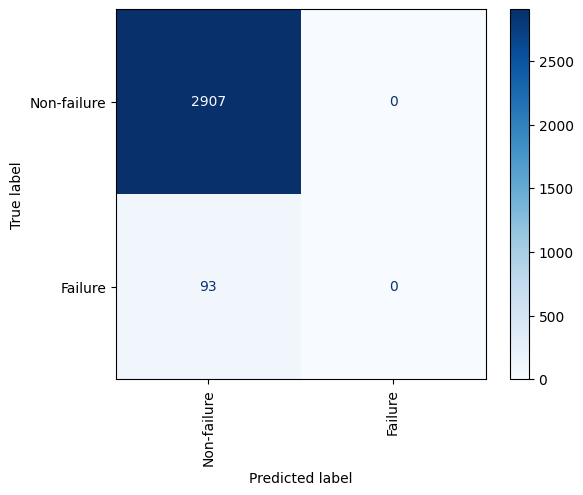

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = gbr_model.predict(X_test) == 1
labels = ['Non-failure','Failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

# Neural Network

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 
model.add(Dense(1024, activation='relu', input_dim=5))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

c:\Users\bemme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,107,393 (8.04 MB)

 Trainable params: 2,107,393 (8.04 MB)

 Non-trainable params: 0 (0.00 B)

In [177]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8850 - loss: 40.3854 - val_accuracy: 0.9660 - val_loss: 6.3075
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9280 - loss: 3.5702 - val_accuracy: 0.9660 - val_loss: 1.3900
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9269 - loss: 1.0417 - val_accuracy: 0.9503 - val_loss: 0.1999
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9544 - loss: 0.3406 - val_accuracy: 0.9660 - val_loss: 5.7669
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9519 - loss: 5.2539 - val_accuracy: 0.9687 - val_loss: 0.1884
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9625 - loss: 0.2348 - val_accuracy: 0.9660 - val_loss: 0.7575
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9505 - loss: 0.5361 - val_accuracy: 0.9327 - val_loss: 0.1737
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9542 - loss: 0.2171 - val_accuracy: 0.9693 - 

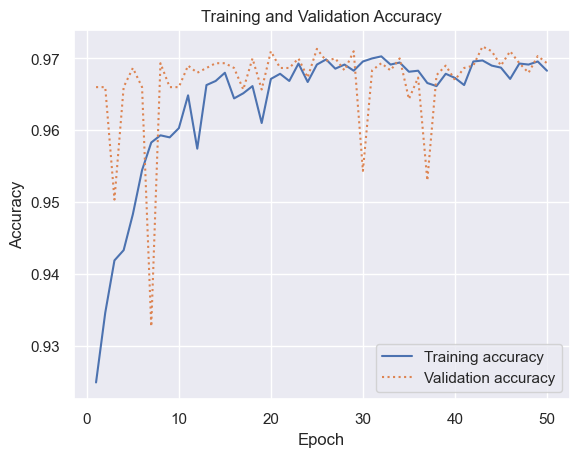

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


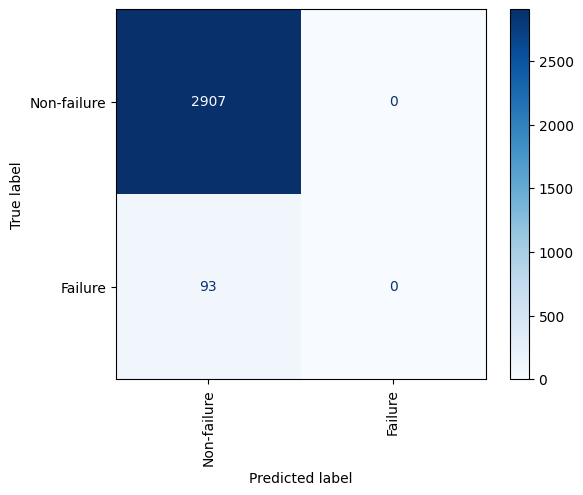

In [197]:
sns.reset_orig()
y_predicted = model.predict(x_test) == 1
labels = ['Non-failure','Failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()